## Reading in the data and exploring basic information

In [1]:
# import necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# read in dataset and display first 10 entries
df = pd.read_csv('Heart_Disease.csv', sep=',')
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [3]:
# summary of information in the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
# check for null values
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [5]:
# Check for duplicates
duplicates = df.duplicated()

# Print the number of duplicates
print(f"Number of duplicates: {duplicates.sum()}")

Number of duplicates: 0


In [6]:
# Count the number of instances in each class
df['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [7]:
# list the unique values of each descriptive feature
df.apply(lambda col: col.unique())

Age               [40, 49, 37, 48, 54, 39, 45, 58, 42, 38, 43, 6...
Sex                                                          [M, F]
ChestPainType                                   [ATA, NAP, ASY, TA]
RestingBP         [140, 160, 130, 138, 150, 120, 110, 136, 115, ...
Cholesterol       [289, 180, 283, 214, 195, 339, 237, 208, 207, ...
FastingBS                                                    [0, 1]
RestingECG                                        [Normal, ST, LVH]
MaxHR             [172, 156, 98, 108, 122, 170, 142, 130, 120, 9...
ExerciseAngina                                               [N, Y]
Oldpeak           [0.0, 1.0, 1.5, 2.0, 3.0, 4.0, 0.5, 2.5, 5.0, ...
ST_Slope                                           [Up, Flat, Down]
HeartDisease                                                 [0, 1]
dtype: object

In [8]:
# feature characteristics dataset
features = pd.read_csv('Heart_Features.csv',index_col ='Feature Name')
features

,Description,Data Type,Scale,Domain,Missing Values
Feature Name,,,,,
Age,age of the patient,integer,ratio,"[40, 49, 37, 48, 54, 39, 45, 58, 42, 38, 43, 6...",0
Sex,sex of the patient,string,nominal,"[M, F]",0
ChestPainType,chest pain type,string,nominal,"[ATA, NAP, ASY, TA]",0
RestingBP,resting blood pressure,integer,ratio,"[140, 160, 130, 138, 150, 120, 110, 136, 115, ...",0
Cholesterol,serum cholesterol,integer,ratio,"[289, 180, 283, 214, 195, 339, 237, 208, 207, ...",0
FastingBS,fasting blood sugar,integer,nominal,"[0, 1]",0
RestingECG,resting electrocardiogram results,string,nominal,"[Normal, ST, LVH]",0
MaxHR,maximum heart rate achieved,integer,ratio,"[172, 156, 98, 108, 122, 170, 142, 130, 120, ...",0
ExerciseAngina,exercise-induced angina,string,nominal,"[N, Y]",0


___________________________________
## Building Data Quality Reports

In [9]:
# building the data quality reports
continuous = pd.DataFrame(columns=['Feature', 'Desc.', 'Count', '% of Missing', 'Card.', 'Min.', 'Q1', 'Median', 'Q3', 'Max.', 'Mean', 'Std. Dev.'])
categorical = pd.DataFrame(columns=['Feature', 'Desc.', 'Count', '% of Missing', 'Card.', 'Mode', 'Mode Freq.', 'Mode %', '2nd Mode', '2nd Mode Freq.', '2nd Mode %'])

# for each feature
for f in features.index:
    # if it's ratio, it's continuous, so add it to continuous DQR
    if features['Scale'][f] == 'ratio':
        continuous.loc[len(continuous)] = [f, features['Description'][f], df[f].count(), (df[f].isnull().sum()*100)/df[f].count(), df[f].nunique(), min(df[f]), round(df[f].describe()['25%'], 2),
                                          df[f].describe()['50%'], df[f].describe()['75%'], max(df[f]), round(df[f].describe()['mean'], 2), round(df[f].describe()['std'], 2)]
    # otherwise, it's categorical, so add to categorical DQR
    else:
        categorical.loc[len(categorical)] = [f, features['Description'][f], df[f].count(), (df[f].isnull().sum()*100)/df[f].count(), df[f].nunique(), df[f].value_counts().index[0], 
                                             df[f].value_counts()[0], (df[f].value_counts()[0] * 100) / df[f].count(), df[f].value_counts().index[1], df[f].value_counts()[1], 
                                             (df[f].value_counts()[1] * 100) / df[f].count()]

# set the index as the feature name
continuous = continuous.set_index('Feature')
categorical = categorical.set_index('Feature')

In [10]:
# continuous DQR
continuous

,Desc.,Count,% of Missing,Card.,Min.,Q1,Median,Q3,Max.,Mean,Std. Dev.
Feature,,,,,,,,,,,
Age,age of the patient,918,0.0,50,28,47.00,54.0,60.0,77,53.51,9.43
RestingBP,resting blood pressure,918,0.0,67,0,120.00,130.0,140.0,200,132.40,18.51
Cholesterol,serum cholesterol,918,0.0,222,0,173.25,223.0,267.0,603,198.80,109.38
MaxHR,maximum heart rate achieved,918,0.0,119,60,120.00,138.0,156.0,202,136.81,25.46
Oldpeak,oldpeak,918,0.0,53,-2.6,0.00,0.6,1.5,6.2,0.89,1.07


In [11]:
# categorical DQR
categorical

,Desc.,Count,% of Missing,Card.,Mode,Mode Freq.,Mode %,2nd Mode,2nd Mode Freq.,2nd Mode %
Feature,,,,,,,,,,
Sex,sex of the patient,918,0.0,2,M,725,78.976035,F,193,21.023965
ChestPainType,chest pain type,918,0.0,4,ASY,496,54.030501,NAP,203,22.113290
FastingBS,fasting blood sugar,918,0.0,2,0,704,76.688453,1,214,23.311547
RestingECG,resting electrocardiogram results,918,0.0,3,Normal,552,60.130719,LVH,188,20.479303
ExerciseAngina,exercise-induced angina,918,0.0,2,N,547,59.586057,Y,371,40.413943
ST_Slope,the slope of the peak exercise ST segment,918,0.0,3,Flat,460,50.108932,Up,395,43.028322
HeartDisease,output class,918,0.0,2,1,410,44.662309,0,508,55.337691


________________________________
## Visualizing Descriptive Features

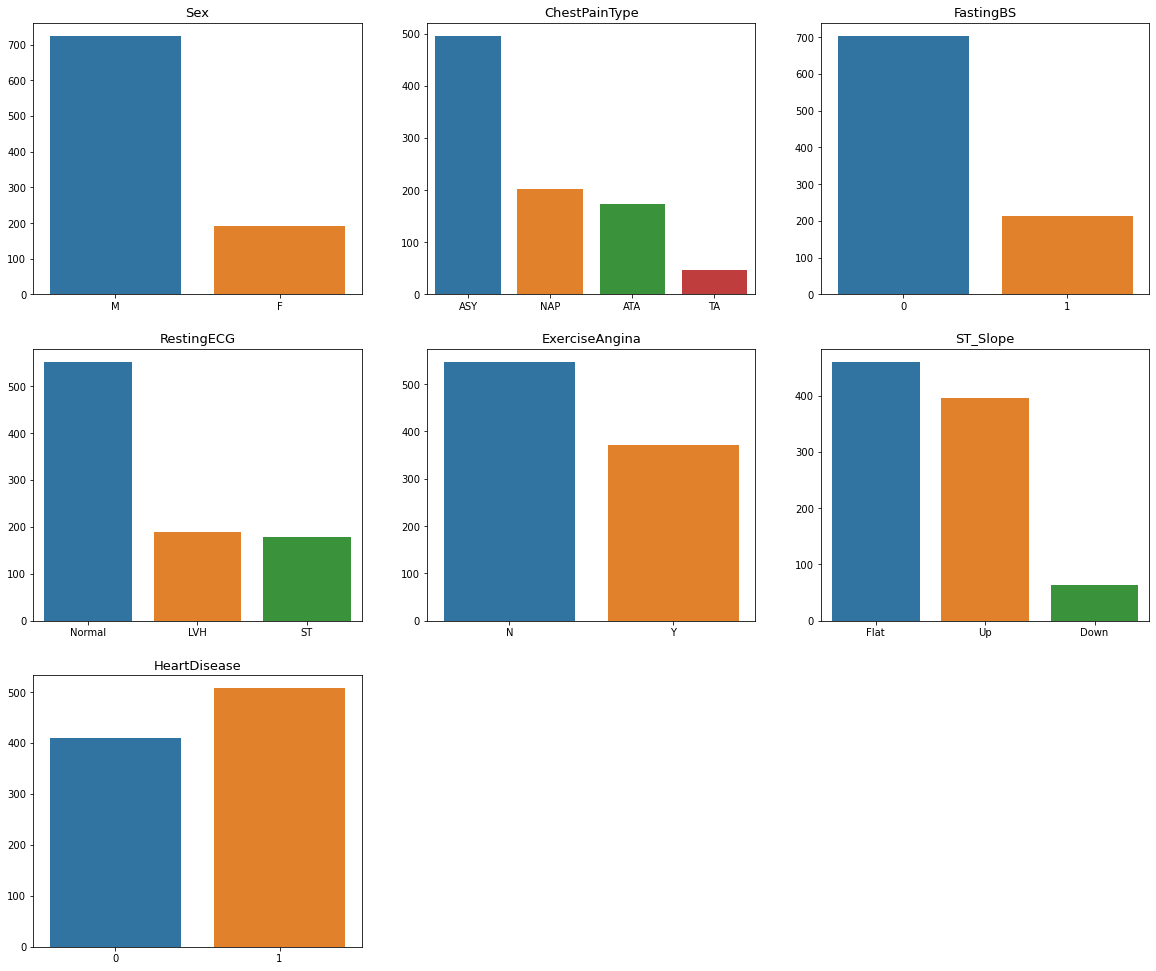

In [12]:
# categorical features bar plot visualization
categ = categorical.index

fig, axes = plt.subplots(ncols=3, nrows=3, figsize=(20,17))
# delete empty subplots
fig.delaxes(axes[2,2])
fig.delaxes(axes[2,1])
a = [ax for ax in axes.flat] # separate the subplots

# plot and title each one
for i in range(len(categ)):
    sns.barplot(x=df[categ[i]].value_counts().index, y=df[categ[i]].value_counts().values, ax=a[i])
    a[i].set_title(categ[i], fontsize = 13)

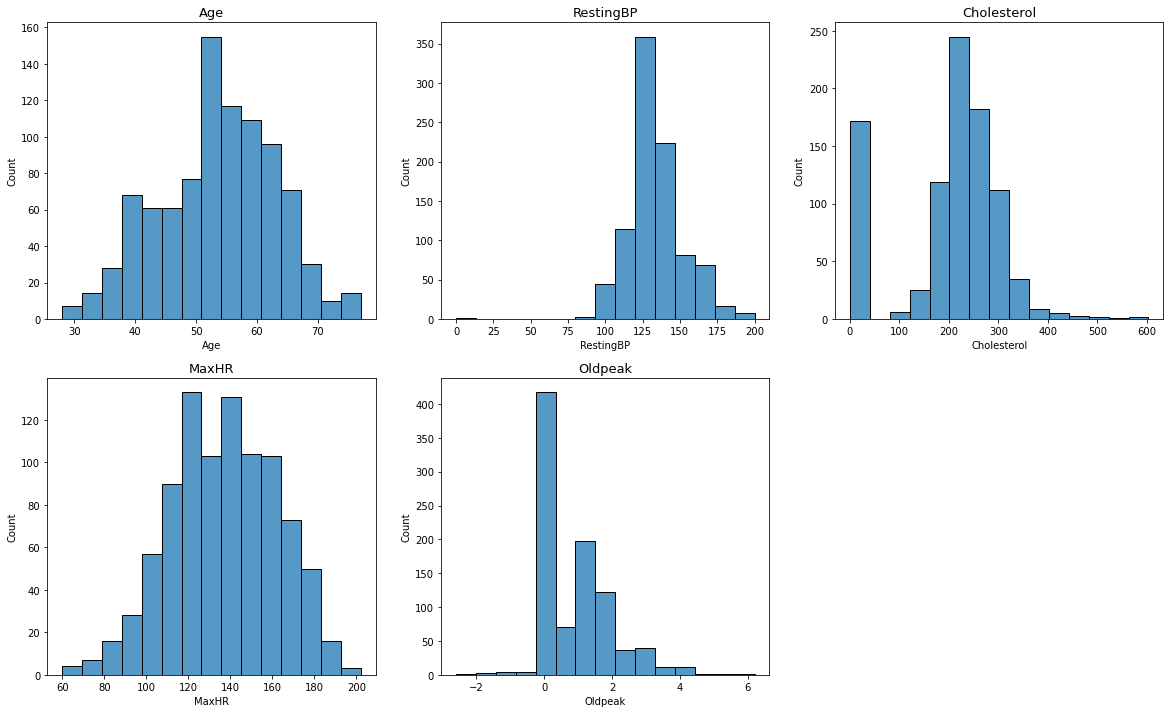

In [13]:
# continuous features histogram visualization
contin = continuous.index

fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(20,12))
fig.delaxes(axes[1,2])  # delete the empty 6th subplot
a = [ax for ax in axes.flat] # separate the subplots

# plot and title each one
for i in range(len(contin)):
    sns.histplot(data=df[contin], x=contin[i], ax=a[i], bins=15)
    a[i].set_title(contin[i], fontsize = 13)

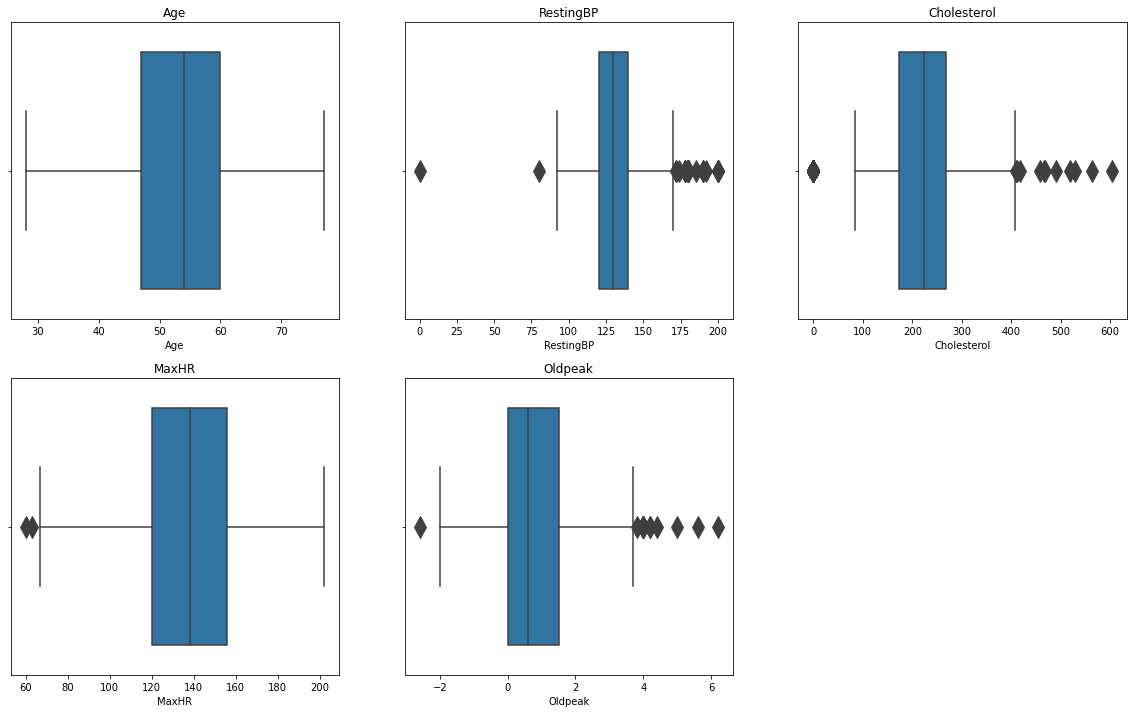

In [14]:
# continuous features boxplot visualization
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(20,12))
fig.delaxes(axes[1,2])  # delete the empty 6th subplot
a = [ax for ax in axes.flat] # separate the subplots

# plot and title each one
for i in range(len(contin)):
    sns.boxplot(data=df[contin], x=contin[i], fliersize=15, ax=a[i])
    a[i].set_title(contin[i], fontsize = 12)

______________________________________
## Cleaning & Normalizing the Data

In [15]:
# # remove outliers by clamping

# # copy original dataset
# df_clamped = df.copy()

# # for each continous feature
# for feature in continuous.index:
#     # get Q1 and Q3 from continuous DQR
#     q1, q3 = continuous.loc[feature, 'Q1'], continuous.loc[feature, 'Q3']
#     # calculate IQR
#     IQR = q3-q1
#     # calculate lower and upper bounds
#     lower, upper = q1 - (1.5*IQR), q3 + (1.5*IQR)
    
#     # use dataframe slicing to get indices where the feature value is less than lower bound
#     for l in df_clamped[df_clamped[feature] < lower].index:
#         # clamp value
#         df_clamped.loc[l, feature] = lower 
        
#     # use dataframe slicing to get indices where the feature value is greater than upper bound
#     for u in df_clamped[df_clamped[feature] > upper].index:
#         #clamp value
#         df_clamped.loc[u, feature] = upper 

In [16]:
# # box plots of continuous feature after clamping outliers
# fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(20,12))
# fig.delaxes(axes[1,2])  #delete the empty 6th subplot
# a = [ax for ax in axes.flat] #separate the subplots

# # plot and title each one
# for i in range(len(contin)):
#     sns.boxplot(data=df_clamped[contin], x=contin[i], fliersize=15, ax=a[i])
#     a[i].set_title(contin[i], fontsize = 12)

In [17]:
from sklearn.preprocessing import MinMaxScaler

# create a copy of the dataset without outliers
df_scaled = df.copy()

# Instantiate the scaler
scaler = MinMaxScaler()

# for each continuous feature
for feature in continuous.index:
    # fit the scaler on the feature
    scaler.fit(df_scaled[[feature]])
    
    # transform the features using the scaler
    df_scaled[feature] = scaler.transform(df_scaled[[feature]])

Text(0.5, 0.98, 'MinMaxScaler Normalization (0-1)')

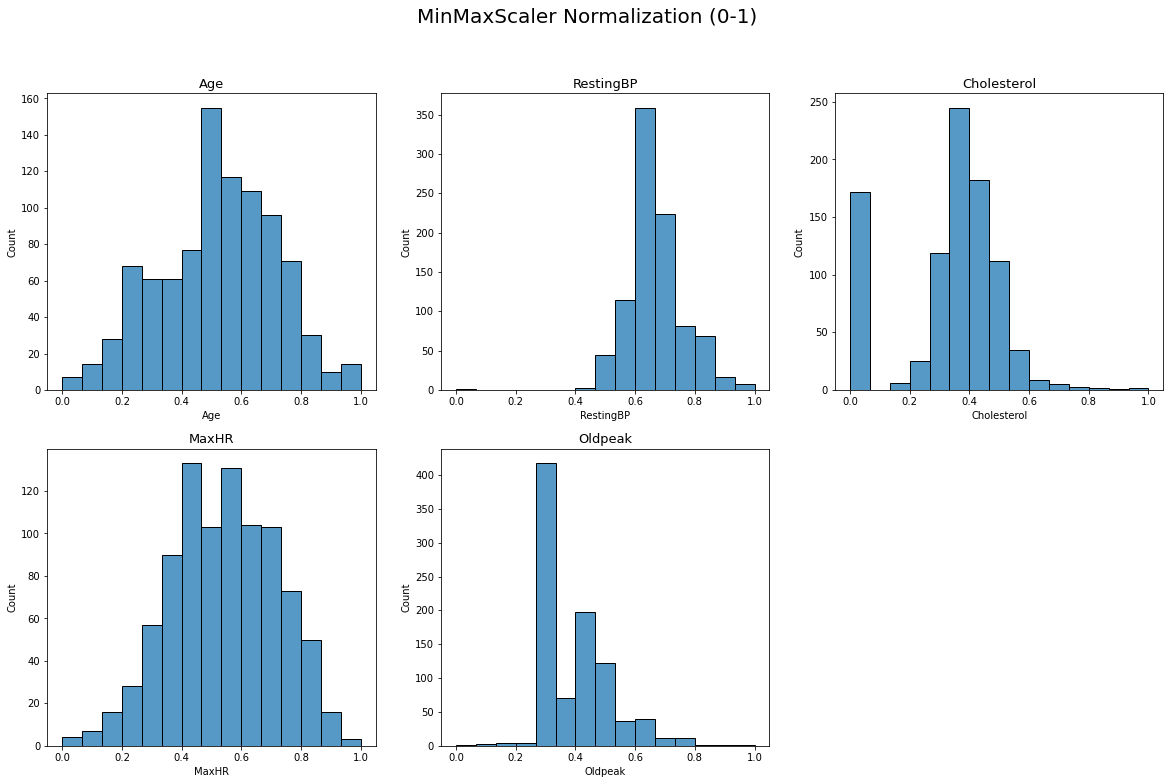

In [18]:
# continuous feature histogram visualization after normalization
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(20,12))
fig.delaxes(axes[1,2])  # delete the empty 6th subplot
a = [ax for ax in axes.flat] # separate the subplot index

# plot and title each one
for i in range(len(contin)):
    sns.histplot(data=df_scaled[contin], x=contin[i], ax=a[i], bins=15)
    a[i].set_title(contin[i], fontsize = 13)

# title group of graphs
fig.suptitle("MinMaxScaler Normalization (0-1)", fontsize=20)

In [19]:
# display first 10 rows of normalized and outlier free dataset
df_scaled.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,0.244898,M,ATA,0.70,0.479270,0,Normal,0.788732,N,0.295455,Up,0
1,0.428571,F,NAP,0.80,0.298507,0,Normal,0.676056,N,0.409091,Flat,1
2,0.183673,M,ATA,0.65,0.469320,0,ST,0.267606,N,0.295455,Up,0
3,0.408163,F,ASY,0.69,0.354892,0,Normal,0.338028,Y,0.465909,Flat,1
4,0.530612,M,NAP,0.75,0.323383,0,Normal,0.436620,N,0.295455,Up,0
5,0.224490,M,NAP,0.60,0.562189,0,Normal,0.774648,N,0.295455,Up,0
6,0.346939,F,ATA,0.65,0.393035,0,Normal,0.774648,N,0.295455,Up,0
7,0.530612,M,ATA,0.55,0.344942,0,Normal,0.577465,N,0.295455,Up,0
8,0.183673,M,ASY,0.70,0.343284,0,Normal,0.492958,Y,0.465909,Flat,1
9,0.408163,F,ATA,0.60,0.470978,0,Normal,0.422535,N,0.295455,Up,0


_______________________________________
## Data Transformation: Label Encoding and One Hot Encoding 

In [20]:
# one hot encoding for categorical features
df_encoded = pd.get_dummies(data = df_scaled, columns=['ChestPainType','RestingECG','ST_Slope'])

# label encoding 
sex_conditions = [(df_encoded['Sex'] == 'M'),(df_encoded['Sex'] == 'F')]
exerciseAngina_conditions = [(df_encoded['ExerciseAngina'] == 'Y'),(df_encoded['ExerciseAngina'] == 'N')]
values = [0,1]


df_encoded['Sex'] = np.select(sex_conditions, values)
df_encoded['ExerciseAngina'] = np.select(exerciseAngina_conditions, values)


# display first 6 rows
display(df_encoded.head(6))

# summary of new one hot encoded date
df_encoded.info()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,0.244898,0,0.70,0.479270,0,0.788732,1,0.295455,0,0,1,0,0,0,1,0,0,0,1
1,0.428571,1,0.80,0.298507,0,0.676056,1,0.409091,1,0,0,1,0,0,1,0,0,1,0
2,0.183673,0,0.65,0.469320,0,0.267606,1,0.295455,0,0,1,0,0,0,0,1,0,0,1
3,0.408163,1,0.69,0.354892,0,0.338028,0,0.465909,1,1,0,0,0,0,1,0,0,1,0
4,0.530612,0,0.75,0.323383,0,0.436620,1,0.295455,0,0,0,1,0,0,1,0,0,0,1
5,0.224490,0,0.60,0.562189,0,0.774648,1,0.295455,0,0,0,1,0,0,1,0,0,0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                918 non-null    float64
 1   Sex                918 non-null    int32  
 2   RestingBP          918 non-null    float64
 3   Cholesterol        918 non-null    float64
 4   FastingBS          918 non-null    int64  
 5   MaxHR              918 non-null    float64
 6   ExerciseAngina     918 non-null    int32  
 7   Oldpeak            918 non-null    float64
 8   HeartDisease       918 non-null    int64  
 9   ChestPainType_ASY  918 non-null    uint8  
 10  ChestPainType_ATA  918 non-null    uint8  
 11  ChestPainType_NAP  918 non-null    uint8  
 12  ChestPainType_TA   918 non-null    uint8  
 13  RestingECG_LVH     918 non-null    uint8  
 14  RestingECG_Normal  918 non-null    uint8  
 15  RestingECG_ST      918 non-null    uint8  
 16  ST_Slope_Down      918 non

________________________________
## Feature Selection

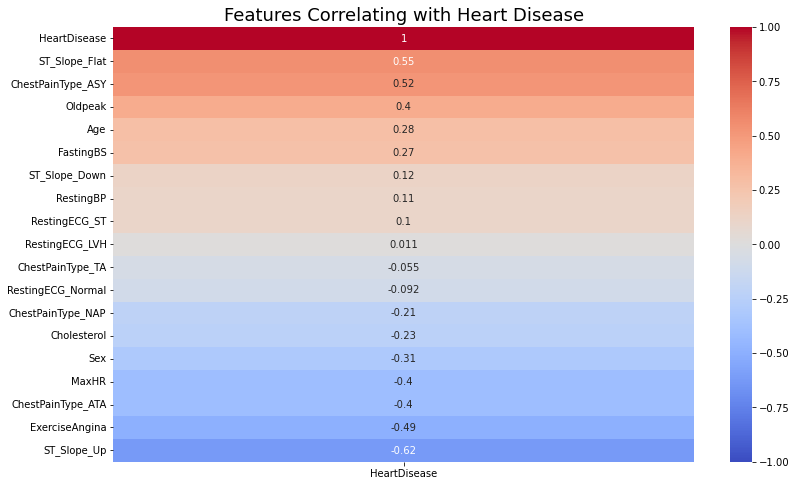

In [21]:
# plotting correlation heatmap
plt.figure(figsize=(13,8))

# Create a heatmap 
heatmap = sns.heatmap(df_encoded.corr()[['HeartDisease']].sort_values(by='HeartDisease', ascending=False), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
heatmap.set_title('Features Correlating with Heart Disease', fontdict={'fontsize':18});


# Show the plot
plt.show()

#### Splitting the dataset

In [22]:
from sklearn.model_selection import train_test_split

# define X and y
encoded_X = df_encoded.drop(columns=['HeartDisease'])
encoded_y = df_encoded['HeartDisease']

# Split the data into 80% training and 20% test sets
encoded_X_train, encoded_X_test, encoded_y_train, encoded_y_test = train_test_split(encoded_X, encoded_y, test_size=0.2, random_state=42)

#### Recursive Feature Elimination

In [23]:
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold

# create decision tree classifier
dtc = DecisionTreeClassifier()

# create recursive feature elimination object
rfe = RFECV(estimator=dtc, cv=KFold(n_splits=5), scoring='accuracy')

# fit the RFE model to the training data
rfe.fit(encoded_X_train, encoded_y_train)

# create a dictionary of feature rankings
ranking_dict = {feature: rank for feature, rank in zip(encoded_X_train.columns, rfe.ranking_)}

# sort the feature rankings in ascending order
sorted_rankings = sorted(ranking_dict.items(), key=lambda x: x[1])

# print the sorted feature rankings
print("{0:18} | {1:2}".format("Feature Name", "Rank"))
for feature, rank in sorted_rankings:
    print("{0:18} | {1:2}".format(feature, rank))

Feature Name       | Rank
ST_Slope_Up        |  1
Cholesterol        |  2
MaxHR              |  3
Age                |  4
Oldpeak            |  5
ChestPainType_ASY  |  6
RestingBP          |  7
Sex                |  8
FastingBS          |  9
ExerciseAngina     | 10
RestingECG_Normal  | 11
RestingECG_LVH     | 12
RestingECG_ST      | 13
ST_Slope_Down      | 14
ChestPainType_NAP  | 15
ChestPainType_ATA  | 16
ST_Slope_Flat      | 17
ChestPainType_TA   | 18


In [24]:
# select the top 10 features
top_10_features = [feature for feature, rank in sorted_rankings[:10]]

# print the top 10 features as a list
print("Top 10 features:", top_10_features)

Top 10 features: ['ST_Slope_Up', 'Cholesterol', 'MaxHR', 'Age', 'Oldpeak', 'ChestPainType_ASY', 'RestingBP', 'Sex', 'FastingBS', 'ExerciseAngina']


#### SelectKBest with Chi2

In [25]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Define the number of features to select
num_features = 10

# Initialize the SelectKBest object with chi2 as the score function
selector = SelectKBest(chi2, k=num_features)

# Fit the selector to the data to perform feature selection
selector.fit(encoded_X_train, encoded_y_train)

# Print the selected feature indices and names
print("Selected feature indices:")
for i, col in zip(range(encoded_X_train.shape[1]), encoded_X_train.columns):
    boolean = 'True' if selector.get_support()[i] else 'False'
    print("{0:18} | selected = {1:5}".format(col, boolean))

Selected feature indices:
Age                | selected = False
Sex                | selected = True 
RestingBP          | selected = False
Cholesterol        | selected = False
FastingBS          | selected = True 
MaxHR              | selected = True 
ExerciseAngina     | selected = True 
Oldpeak            | selected = False
ChestPainType_ASY  | selected = True 
ChestPainType_ATA  | selected = True 
ChestPainType_NAP  | selected = True 
ChestPainType_TA   | selected = False
RestingECG_LVH     | selected = False
RestingECG_Normal  | selected = False
RestingECG_ST      | selected = False
ST_Slope_Down      | selected = True 
ST_Slope_Flat      | selected = True 
ST_Slope_Up        | selected = True 


In [26]:
# Print the selected feature names in a list
selected_features = list(encoded_X_train.columns[selector.get_support()])
print("Selected features: ", selected_features)

Selected features:  ['Sex', 'FastingBS', 'MaxHR', 'ExerciseAngina', 'ChestPainType_ASY', 'ChestPainType_ATA', 'ChestPainType_NAP', 'ST_Slope_Down', 'ST_Slope_Flat', 'ST_Slope_Up']


 ['ST_Slope_Up', 'MaxHR', 'Age', 'Oldpeak', 'RestingBP', 'ChestPainType_ASY', 'Cholesterol', 'Sex', 'RestingECG_Normal', 'FastingBS']
 

['Sex', 'FastingBS', 'MaxHR', 'ExerciseAngina', 'ChestPainType_ASY', 'ChestPainType_ATA', 'ChestPainType_NAP', 'ST_Slope_Down', 'ST_Slope_Flat', 'ST_Slope_Up']

In [27]:
# choose selected features and save as new dataframe
df_ML = df_encoded[['Age',  'Sex' , 'FastingBS',  'MaxHR', 'ExerciseAngina','Oldpeak', 'ChestPainType_ASY', 
                    'ChestPainType_ATA','RestingECG_Normal', 'ST_Slope_Flat', 'ST_Slope_Up', 'HeartDisease']]

df_ML.head(10)

,Age,Sex,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ASY,ChestPainType_ATA,RestingECG_Normal,ST_Slope_Flat,ST_Slope_Up,HeartDisease
0,0.244898,0,0,0.788732,1,0.295455,0,1,1,0,1,0
1,0.428571,1,0,0.676056,1,0.409091,0,0,1,1,0,1
2,0.183673,0,0,0.267606,1,0.295455,0,1,0,0,1,0
3,0.408163,1,0,0.338028,0,0.465909,1,0,1,1,0,1
4,0.530612,0,0,0.436620,1,0.295455,0,0,1,0,1,0
5,0.224490,0,0,0.774648,1,0.295455,0,0,1,0,1,0
6,0.346939,1,0,0.774648,1,0.295455,0,1,1,0,1,0
7,0.530612,0,0,0.577465,1,0.295455,0,1,1,0,1,0
8,0.183673,0,0,0.492958,0,0.465909,1,0,1,1,0,1
9,0.408163,1,0,0.422535,1,0.295455,0,1,1,0,1,0


___________________________________________

## Model Implementation on Dataset After Feature Selection & Evaluation of Implemented Models

In [28]:
Ml_X =  df_ML.drop(columns=['HeartDisease'])
Ml_y = df_ML['HeartDisease']

In [29]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
Ml_X_train, Ml_X_test, Ml_y_train, Ml_y_test = train_test_split(Ml_X, Ml_y, test_size=0.2, random_state=42)

### Support Vector Machines

In [30]:
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc


# Define the cross-validation splitter
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize the classifier
sv_clf = SVC(kernel='linear', probability=True)

# Fit the classifier on the entire training set
sv_clf.fit(Ml_X_train, Ml_y_train)

# Create empty lists to store the scores and predictions
train_scores = []
val_scores = []
y_true = []
y_pred = []

# Loop through the cross-validation splits
for train_index, val_index in cv.split(Ml_X_train, Ml_y_train):
    # Split the data into training and validation sets
    Ml_X_train_fold, Ml_y_train_fold = Ml_X_train.iloc[train_index], Ml_y_train.iloc[train_index]
    X_val, y_val = Ml_X_train.iloc[val_index], Ml_y_train.iloc[val_index]

    # Predict on the training and validation data
    Ml_y_train_pred = sv_clf.predict(Ml_X_train_fold)
    y_val_pred = sv_clf.predict(X_val)

    # Append the scores to the lists
    train_score = accuracy_score(Ml_y_train_fold, Ml_y_train_pred)
    val_score = accuracy_score(y_val, y_val_pred)
    train_scores.append(train_score)
    val_scores.append(val_score)

    # Append the true and predicted labels to the lists
    y_true.append(y_val)
    y_pred.append(y_val_pred)

# Concatenate the true and predicted labels from each fold
sv_y_true = np.concatenate(y_true)
sv_y_pred = np.concatenate(y_pred)

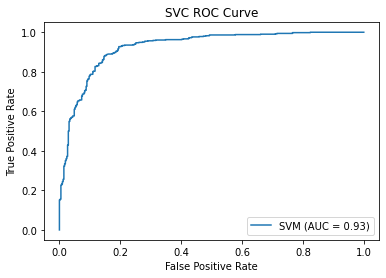

Mean training score: 0.87
Mean validation score: 0.87


In [31]:
# Predict probabilities for each sample
probs = sv_clf.predict_proba(Ml_X)[:, 1]

# Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(Ml_y, probs)

# Calculate the AUC score
train_sv_auc_score = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label=f'SVM (AUC = {train_sv_auc_score:.2f})')

# Add labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVC ROC Curve')
plt.legend()
plt.show()

# Print the mean training and validation scores
print(f"Mean training score: {sum(train_scores)/len(train_scores):.2f}")
print(f"Mean validation score: {sum(val_scores)/len(val_scores):.2f}")

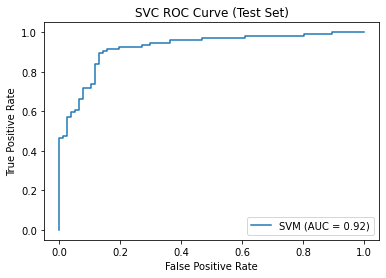

In [32]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities for each sample in the test set
probs = sv_clf.predict_proba(Ml_X_test)[:, 1]

# Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(Ml_y_test, probs)

# Calculate the AUC score
sv_test_auc_score = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label=f'SVM (AUC = {sv_test_auc_score:.2f})')

# Add labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVC ROC Curve (Test Set)')
plt.legend()
plt.show()

In [33]:
# Predict on the test set
y_test_pred = sv_clf.predict(Ml_X_test)

# Calculate accuracy score for the test set
sv_test_accuracy = accuracy_score(Ml_y_test, y_test_pred)
print(f"Test accuracy score: {sv_test_accuracy:.2f}")

# Calculate the confusion matrix for the test set
sv_test_conf_matrix = confusion_matrix(Ml_y_test, y_test_pred)
print("SVC Confusion matrix (test set):")
print(sv_test_conf_matrix)

Test accuracy score: 0.86
SVC Confusion matrix (test set):
[[68  9]
 [17 90]]


In [34]:
# Calculate the true positive rate
TP = sv_test_conf_matrix[1, 1]
FN = sv_test_conf_matrix[1, 0]
sensitivity = TP / (TP + FN)

print(f"SVM Sensitivity: {sensitivity:.2f}")

SVM Sensitivity: 0.84


In [35]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search over
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto'],
    'class_weight': [None, 'balanced']
}

# Initialize the classifier
grid_sv_clf = SVC()

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=grid_sv_clf, param_grid=param_grid, cv=5)

# Fit the grid search object on the training data
grid_search.fit(Ml_X_train, Ml_y_train)

# Print the best hyperparameters and score
print(f"Best hyperparameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_:.2f}")

# Evaluate the performance of the best model on the test data
grid_y_pred = grid_search.predict(Ml_X_test)
test_score = accuracy_score(Ml_y_test, grid_y_pred)
print(f"Test score: {test_score:.2f}")

Best hyperparameters: {'C': 10, 'class_weight': None, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
Best score: 0.87
Test score: 0.86


In [36]:
# # print support vectors and classifier parameters
# print("Support Vectors: ", grid_sv_clf.support_vectors_)
# print()

# print("Bias value: ", grid_sv_clf.intercept_)
# print()

# print("Number of SV for each class: ", grid_sv_clf.n_support_)

In [37]:
# Initialize the SVC classifier with the best hyperparameters
optimized_sv_clf = SVC(C=10, degree=2, gamma='scale', kernel='rbf')

# Fit the classifier on the training data
optimized_sv_clf.fit(Ml_X_train, Ml_y_train)

# Make predictions on the test data
optimized_y_pred = optimized_sv_clf.predict(Ml_X_test)

# Evaluate the performance on the test data
test_score = accuracy_score(Ml_y_test, optimized_y_pred)
print(f"Test score: {test_score:.2f}")

Test score: 0.86


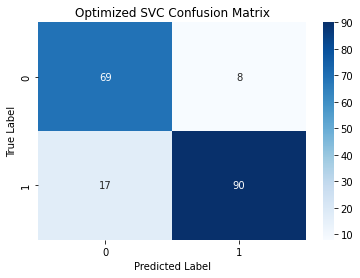

In [38]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
optimized_sv_conf_matrix = confusion_matrix(Ml_y_test, optimized_y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(optimized_sv_conf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Optimized SVC Confusion Matrix')
plt.show()

In [39]:
# Calculate the true positive rate
TP = optimized_sv_conf_matrix[1, 1]
FN = optimized_sv_conf_matrix[1, 0]
optimized_sv_sensitivity = TP / (TP + FN)

print(f"Optimized SVC Sensitivity: {optimized_sv_sensitivity:.2f}")

Optimized SVC Sensitivity: 0.84


In [40]:
from sklearn.metrics import classification_report

# Calculate the classification report
optimized_sv_report = classification_report(Ml_y_test, optimized_y_pred)

# Print the classification report
print(optimized_sv_report)

              precision    recall  f1-score   support

           0       0.80      0.90      0.85        77
           1       0.92      0.84      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.87      0.86       184
weighted avg       0.87      0.86      0.86       184



### Decision Tree Model

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.model_selection import StratifiedKFold
import numpy as np
import matplotlib.pyplot as plt

# Initialize the cross-validation object
cv = StratifiedKFold(n_splits=5)

# Initialize the classifier
dt_clf = DecisionTreeClassifier()

# Fit the classifier on the training data
dt_clf.fit(Ml_X_train, Ml_y_train)

# Create empty lists to store the scores and predictions
train_scores = []
val_scores = []
cm_list = []
fpr_list = []
tpr_list = []

# Loop through the cross-validation splits
for train_index, val_index in cv.split(Ml_X_train, Ml_y_train):
    # Split the data into training and validation sets
    X_train, y_train = Ml_X_train.iloc[train_index], Ml_y_train.iloc[train_index]
    X_val, y_val = Ml_X_train.iloc[val_index], Ml_y_train.iloc[val_index]

    # Predict on the training and validation data
    y_train_pred = dt_clf.predict(X_train)
    y_val_pred = dt_clf.predict(X_val)

    # Append the scores to the lists
    train_score = accuracy_score(y_train, y_train_pred)
    val_score = accuracy_score(y_val, y_val_pred)
    train_scores.append(train_score)
    val_scores.append(val_score)

    # Append the confusion matrix to the list
    dt_cm = confusion_matrix(y_val, y_val_pred)
    cm_list.append(dt_cm)

    # Append the FPR and TPR to the list
    probs = dt_clf.predict_proba(X_val)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_val, probs)
    fpr_list.append(fpr)
    tpr_list.append(tpr)

# Concatenate the confusion matrices and FPR/TPR lists from each fold
cm_all = np.sum(cm_list, axis=0)
fpr_all = np.concatenate(fpr_list)
tpr_all = np.concatenate(tpr_list)

# Print the mean training and validation scores
print(f"Mean training score: {sum(train_scores)/len(train_scores):.2f}")
print(f"Mean validation score: {sum(val_scores)/len(val_scores):.2f}")

Mean training score: 1.00
Mean validation score: 1.00


In [42]:
# Print the confusion matrix for the whole dataset
print("DT Confusion matrix:")
print(cm_all)

DT Confusion matrix:
[[333   0]
 [  0 401]]


In [43]:
# Calculate the true positive rate
TP = cm_all[1, 1]
FN = cm_all[1, 0]
dt_sensitivity = TP / (TP + FN)

print(f"DT Sensitivity: {dt_sensitivity:.2f}")

DT Sensitivity: 1.00


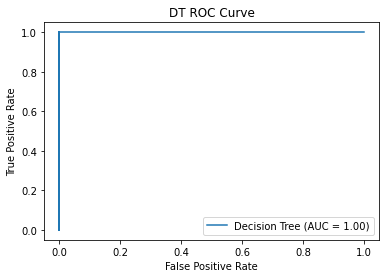

In [44]:
# Sort the fpr_all and tpr_all arrays based on the fpr_all values
idx = np.argsort(fpr_all)
fpr_all = fpr_all[idx]
tpr_all = tpr_all[idx]

# Calculate the AUC score
dt_auc_score = auc(fpr_all, tpr_all)

# Plot the ROC curve
plt.plot(fpr_all, tpr_all, label=f'Decision Tree (AUC = {dt_auc_score:.2f})')

# Add labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('DT ROC Curve')
plt.legend()
plt.show()

In [45]:
# Predict on the test set
y_test_pred = dt_clf.predict(Ml_X_test)

# Calculate accuracy score for the test set
dt_test_accuracy = accuracy_score(Ml_y_test, y_test_pred)
print(f"Test accuracy score: {dt_test_accuracy:.2f}")

# Calculate the confusion matrix for the test set
dt_test_conf_matrix = confusion_matrix(Ml_y_test, y_test_pred)
print("DT Confusion matrix (test set):")
print(dt_test_conf_matrix)

Test accuracy score: 0.74
DT Confusion matrix (test set):
[[63 14]
 [33 74]]


In [46]:
# Initialize the classifier
grid_dt_clf = DecisionTreeClassifier()

# Define the hyperparameter space to search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(grid_dt_clf, param_grid, cv=5)

# Fit the GridSearchCV object on the training data
grid_search.fit(Ml_X_train, Ml_y_train)

# Print the best hyperparameters found
print("Best hyperparameters found:")
print(grid_search.best_params_)

# Evaluate the best model on the test data
best_dt_clf = grid_search.best_estimator_
y_pred = best_dt_clf.predict(Ml_X_test)
grid_dt_acc = accuracy_score(Ml_y_test, y_pred)
print("Accuracy on test data:", grid_dt_acc)

Best hyperparameters found:
{'criterion': 'entropy', 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 5}
Accuracy on test data: 0.8260869565217391


In [60]:
# Initialize the Decision Tree classifier with best hyperparameters
optimized_dt_clf = DecisionTreeClassifier(criterion='entropy',  max_depth=5,
                                          max_features='log2', min_samples_leaf=4, min_samples_split=5)

# Train the model on the training data
optimized_dt_clf.fit(Ml_X_train, Ml_y_train)

# Make predictions on the test data
y_pred = optimized_dt_clf.predict(Ml_X_test)

# Calculate the accuracy score on the test data
optimized_dt_acc_score = accuracy_score(Ml_y_test, y_pred)

# Print the accuracy score on the test data
print(f"Accuracy on test data: {optimized_dt_acc_score}")

Accuracy on test data: 0.8315217391304348


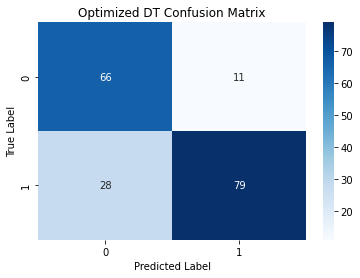

In [48]:
# Create the confusion matrix
optimized_dt_conf_matrix = confusion_matrix(Ml_y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(optimized_dt_conf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Optimized DT Confusion Matrix')
plt.show()

In [49]:
# Calculate the true positive rate
TP = cm_all[1, 1]
FN = cm_all[1, 0]
optimized_dt_sensitivity = TP / (TP + FN)

print(f"Optimized DT Sensitivity: {optimized_dt_sensitivity:.2f}")

Optimized DT Sensitivity: 1.00


In [50]:
# Calculate the classification report
optimized_dt_report = classification_report(Ml_y_test, y_pred)

# Print the classification report
print(optimized_dt_report)

              precision    recall  f1-score   support

           0       0.70      0.86      0.77        77
           1       0.88      0.74      0.80       107

    accuracy                           0.79       184
   macro avg       0.79      0.80      0.79       184
weighted avg       0.80      0.79      0.79       184



___________________________________________

## Model Implementation on Original Encoded Dataset & Evaluation of Implemented Models

SVC Confusion matrix:
[[275  58]
 [ 29 372]]


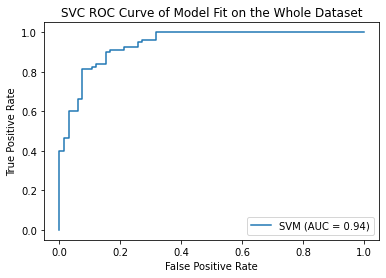

Mean training score: 0.88
Mean validation score: 0.88


In [51]:
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc

# Initialize the cross-validation object
cv = StratifiedKFold(n_splits=5)

# Initialize the classifier
encoded_sv_clf = SVC(kernel='rbf', probability=True)

# Fit the classifier on the training data
encoded_sv_clf.fit(encoded_X_train, encoded_y_train)

# Create empty lists to store the scores and predictions
train_scores = []
val_scores = []
y_true = []
y_pred = []

# Loop through the cross-validation splits
for train_index, val_index in cv.split(encoded_X_train, encoded_y_train):
    # Split the data into training and validation sets
    X_train, y_train = encoded_X_train.iloc[train_index], encoded_y_train.iloc[train_index]
    X_val, y_val = encoded_X_train.iloc[val_index], encoded_y_train.iloc[val_index]


    # Predict on the training and validation data
    y_train_pred = encoded_sv_clf.predict(X_train)
    y_val_pred = encoded_sv_clf.predict(X_val)

    # Append the scores to the lists
    train_score = accuracy_score(y_train, y_train_pred)
    val_score = accuracy_score(y_val, y_val_pred)
    train_scores.append(train_score)
    val_scores.append(val_score)

    # Append the true and predicted labels to the lists
    y_true.append(y_val)
    y_pred.append(y_val_pred)

# Concatenate the true and predicted labels from each fold
encoded_sv_y_true = np.concatenate(y_true)
encoded_sv_y_pred = np.concatenate(y_pred)

# Calculate the confusion matrix for the whole dataset
encoded_sv_conf_matrix = confusion_matrix(encoded_sv_y_true, encoded_sv_y_pred)
print("SVC Confusion matrix:")
print(encoded_sv_conf_matrix)

# Predict probabilities for each sample
probs = encoded_sv_clf.predict_proba(X_val)[:, 1]

# Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_val, probs)

# Calculate the AUC score
encoded_sv_auc_score = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label=f'SVM (AUC = {encoded_sv_auc_score:.2f})')

# Add labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVC ROC Curve of Model Fit on the Whole Dataset')
plt.legend()
plt.show()

# Print the mean training and validation scores
print(f"Mean training score: {sum(train_scores)/len(train_scores):.2f}")
print(f"Mean validation score: {sum(val_scores)/len(val_scores):.2f}")

In [52]:
# Predict on the test set
y_test_pred = encoded_sv_clf.predict(encoded_X_test)

# Calculate accuracy score for the test set
encoded_sv_test_accuracy = accuracy_score(encoded_y_test, y_test_pred)
print(f"Test accuracy score: {encoded_sv_test_accuracy:.2f}")

# Calculate the confusion matrix for the test set
encoded_sv_test_conf_matrix = confusion_matrix(encoded_y_test, y_test_pred)
print("SVC Confusion matrix of Test Set of Whole Dataset:")
print(encoded_sv_test_conf_matrix)

Test accuracy score: 0.85
SVC Confusion matrix of Test Set of Whole Dataset:
[[68  9]
 [18 89]]


In [53]:
# Calculate the true positive rate
TP = encoded_sv_test_conf_matrix[1, 1]
FN = encoded_sv_test_conf_matrix[1, 0]
encoded_sv_sensitivity = TP / (TP + FN)

print(f"SVM Sensitivity: {encoded_sv_sensitivity:.2f}")

SVM Sensitivity: 0.83


In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.model_selection import StratifiedKFold
import numpy as np
import matplotlib.pyplot as plt

# Initialize the cross-validation object
cv = StratifiedKFold(n_splits=5)

# Initialize the classifier
encoded_dt_clf = DecisionTreeClassifier()

# Fit the classifier on the training data
encoded_dt_clf.fit(encoded_X_train, encoded_y_train)

# Create empty lists to store the scores and predictions
train_scores = []
val_scores = []
cm_list = []
fpr_list = []
tpr_list = []

# Loop through the cross-validation splits
for train_index, val_index in cv.split(encoded_X_train, encoded_y_train):
    # Split the data into training and validation sets
    X_train, y_train = encoded_X_train.iloc[train_index], encoded_y_train.iloc[train_index]
    X_val, y_val = encoded_X_train.iloc[val_index], encoded_y_train.iloc[val_index]

    # Predict on the training and validation data
    y_train_pred = encoded_dt_clf.predict(X_train)
    y_val_pred = encoded_dt_clf.predict(X_val)

    # Append the scores to the lists
    train_score = accuracy_score(y_train, y_train_pred)
    val_score = accuracy_score(y_val, y_val_pred)
    train_scores.append(train_score)
    val_scores.append(val_score)

    # Append the confusion matrix to the list
    encoded_dt_cm = confusion_matrix(y_val, y_val_pred)
    cm_list.append(encoded_dt_cm)

    # Append the FPR and TPR to the list
    probs = encoded_dt_clf.predict_proba(X_val)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_val, probs)
    fpr_list.append(fpr)
    tpr_list.append(tpr)

# Concatenate the confusion matrices and FPR/TPR lists from each fold
endcoded_cm_all = np.sum(cm_list, axis=0)
encoded_fpr_all = np.concatenate(fpr_list)
encoded_tpr_all = np.concatenate(tpr_list)

# Print the mean training and validation scores
print(f"Mean training score: {sum(train_scores)/len(train_scores):.2f}")
print(f"Mean validation score: {sum(val_scores)/len(val_scores):.2f}")

Mean training score: 1.00
Mean validation score: 1.00


In [55]:
# Predict on the test set
y_test_pred = encoded_dt_clf.predict(encoded_X_test)

# Calculate accuracy score for the test set
encoded_dt_test_accuracy = accuracy_score(encoded_y_test, y_test_pred)
print(f"Test accuracy score: {encoded_dt_test_accuracy:.2f}")

# Calculate the confusion matrix for the test set
encoded_dt_test_conf_matrix = confusion_matrix(encoded_y_test, y_test_pred)
print("DT Confusion matrix of Test Set of Whole Dataset:")
print(encoded_dt_test_conf_matrix)

Test accuracy score: 0.82
DT Confusion matrix of Test Set of Whole Dataset:
[[65 12]
 [21 86]]


In [58]:
# Calculate the true positive rate
TP = encoded_sv_test_conf_matrix[1, 1]
FN = encoded_sv_test_conf_matrix[1, 0]
encoded_dt_test_conf_sensitivity = TP / (TP + FN)

print(f"DT Sensitivity: {encoded_dt_test_conf_sensitivity:.2f}")

DT Sensitivity: 0.83


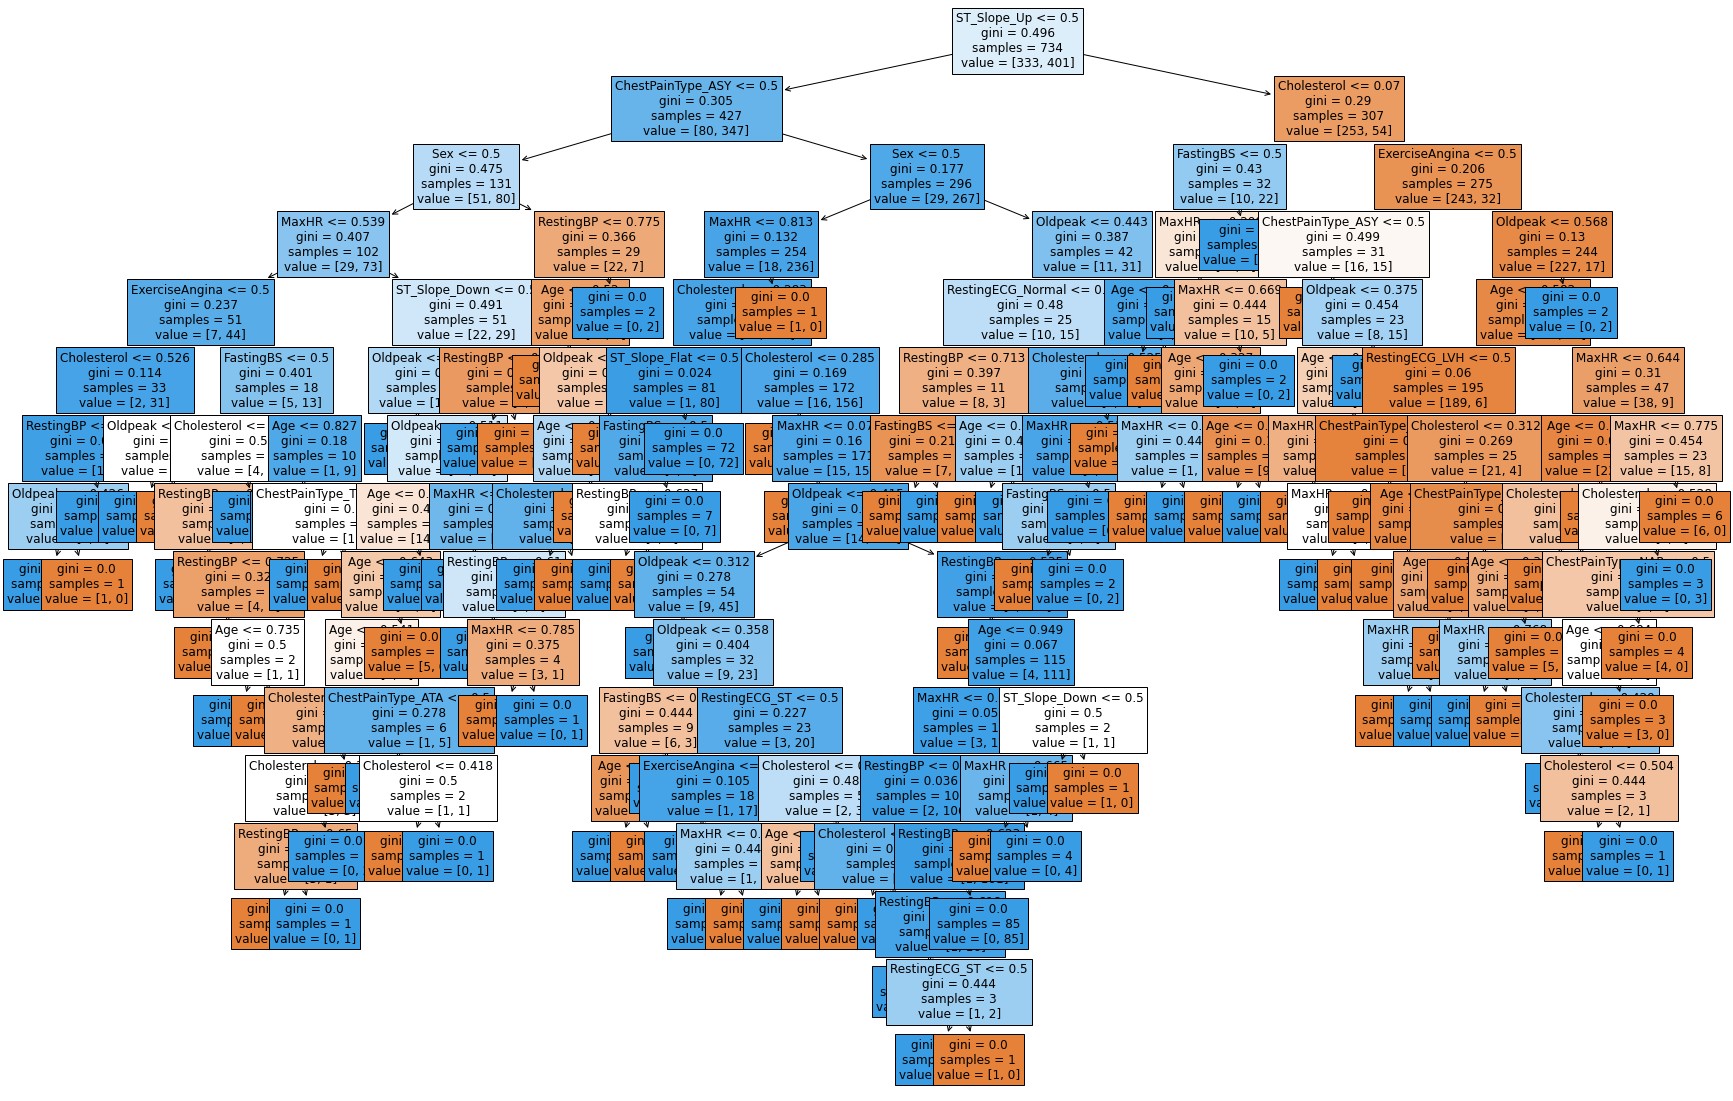

In [57]:
from sklearn.tree import plot_tree

# plot the decision tree
plt.figure(figsize=(30,20))
plot_tree(encoded_dt_clf, filled=True, feature_names=encoded_X.columns, fontsize=12)
plt.show()